In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

%matplotlib inline


In [8]:
df_bank = pd.read_csv('data/bank.csv')
df_bank.head()

,age,job,marital,education,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed
0,30,unemployed,married,primary,no,1787,no,no,1,0,no
1,33,services,married,secondary,no,4789,yes,yes,1,4,no
2,35,management,single,tertiary,no,1350,yes,no,1,1,no
3,30,management,married,tertiary,no,1476,yes,yes,4,0,no
4,59,blue-collar,married,secondary,no,0,yes,no,1,0,no


In [9]:
df_bank.subscribed.value_counts()

subscribed
no     4000
yes     521
Name: count, dtype: int64

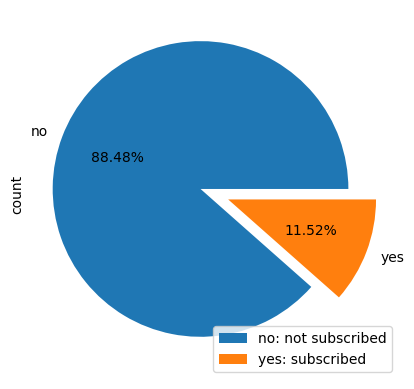

In [10]:
d=df_bank.subscribed.value_counts()
d.plot(kind='pie', subplots=True, autopct='%1.2f%%', explode=(0.1, 0.1))
plt.legend(['no: not subscribed','yes: subscribed'])

## Data resampling

In [11]:
df_subscribed = df_bank[df_bank.subscribed == 'yes']
df_non_subscribed = df_bank[df_bank.subscribed == 'no']
print('Df subscribed shape =', df_subscribed.shape)
print('Df non subscribed shape =', df_non_subscribed.shape)


Df subscribed shape = (521, 11)
Df non subscribed shape = (4000, 11)


In [12]:
from sklearn.utils import resample

df_subscribed_resampled = resample(df_subscribed, replace=True, n_samples=3000)

df_bank_new = pd.concat([df_subscribed_resampled, df_non_subscribed])
df_bank_new.shape

(7000, 11)

In [13]:
def print_unique_values(df: pd.DataFrame):
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f'{col} : {df[col].unique()}')

In [14]:
print_unique_values(df_bank_new)

job : ['technician' 'admin.' 'management' 'blue-collar' 'services' 'retired'
 'entrepreneur' 'student' 'self-employed' 'housemaid' 'unemployed'
 'unknown']
marital : ['married' 'divorced' 'single']
education : ['secondary' 'tertiary' 'primary' 'unknown']
default : ['no' 'yes']
housing-loan : ['yes' 'no']
personal-loan : ['no' 'yes']
subscribed : ['yes' 'no']


In [15]:
yes_no_cols = ['default', 'housing-loan', 'personal-loan', 'subscribed']

for col in yes_no_cols:
    df_bank_new[col].replace({'yes': 1, 'no':0}, inplace=True)

print_unique_values(df_bank_new)

job : ['technician' 'admin.' 'management' 'blue-collar' 'services' 'retired'
 'entrepreneur' 'student' 'self-employed' 'housemaid' 'unemployed'
 'unknown']
marital : ['married' 'divorced' 'single']
education : ['secondary' 'tertiary' 'primary' 'unknown']


/tmp/ipykernel_1404006/543339478.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_new[col].replace({'yes': 1, 'no':0}, inplace=True)
/tmp/ipykernel_1404006/543339478.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_bank_new[col].replace({'yes': 1, 'no':0}, inplace=True)


In [16]:
unknown_cols = ['job','education']
for col in unknown_cols:
    df_bank_new[col].replace('unknown', np.nan, inplace=True)
    df_bank_new[col].ffill(inplace=True)

print_unique_values(df_bank_new)

job : ['technician' 'admin.' 'management' 'blue-collar' 'services' 'retired'
 'entrepreneur' 'student' 'self-employed' 'housemaid' 'unemployed']
marital : ['married' 'divorced' 'single']
education : ['secondary' 'tertiary' 'primary']


/tmp/ipykernel_1404006/2946897223.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_new[col].replace('unknown', np.nan, inplace=True)
/tmp/ipykernel_1404006/2946897223.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [17]:
df_bank_new['job'].replace('admin.', 'admin', inplace=True)

In [18]:
df_bank_new = pd.get_dummies(data=df_bank_new, columns=['job','marital', 'education'], dtype=int)
df_bank_new.head()

,age,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
1760,35,0,0,1,0,1,5,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3931,47,0,3676,0,0,1,3,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
941,34,0,0,1,0,1,2,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
297,45,0,-311,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3301,60,0,4256,1,0,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [20]:
#scaling
cols_to_scale = ['age', 'balance', 'previous-campaign']
for col in cols_to_scale:
    df_bank_new[col] = (df_bank_new[col] - df_bank_new[col].min())/(df_bank_new[col].max() - df_bank_new[col].min())

df_bank_new.head()

,age,default,balance,housing-loan,personal-loan,current-campaign,previous-campaign,subscribed,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary
1760,0.235294,0,0.044469,1,0,1,0.20,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0
3931,0.411765,0,0.093811,0,0,1,0.12,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
941,0.220588,0,0.044469,1,0,1,0.08,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1
297,0.382353,0,0.040295,1,0,1,0.00,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3301,0.602941,0,0.101596,1,0,3,0.04,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1


In [21]:
df_bank_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7000 entries, 1760 to 4520
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7000 non-null   float64
 1   default              7000 non-null   int64  
 2   balance              7000 non-null   float64
 3   housing-loan         7000 non-null   int64  
 4   personal-loan        7000 non-null   int64  
 5   current-campaign     7000 non-null   int64  
 6   previous-campaign    7000 non-null   float64
 7   subscribed           7000 non-null   int64  
 8   job_admin            7000 non-null   int64  
 9   job_blue-collar      7000 non-null   int64  
 10  job_entrepreneur     7000 non-null   int64  
 11  job_housemaid        7000 non-null   int64  
 12  job_management       7000 non-null   int64  
 13  job_retired          7000 non-null   int64  
 14  job_self-employed    7000 non-null   int64  
 15  job_services         7000 non-null   int

In [22]:
# Split dataset
X = df_bank_new.drop(['subscribed'], axis=1)
y = df_bank_new['subscribed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=50)
print(X_train.shape)
print(X_test.shape)

(5600, 24)
(1400, 24)


In [32]:
def plot_roc_curve(model):
    y_prob=model.predict_proba(X_test)[:,1:2]
    fpr, tpr, threshholds = metrics.roc_curve(y_test, y_prob, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label='ROC Curve (area = %2f)' % auc_score)

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]') 
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example') 
    plt.legend(loc="lower right")
    plt.show()

In [33]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = metrics.confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8,6))
    sn.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Subscribed", "Not Subscribed"], yticklabels = ["Subscribed", "Not Subscribed"])


In [34]:
def print_classification_report(model):
    y_pred = model.predict(X_test)
    print(metrics.classification_report(y_test, y_pred))

## Modeling


In [37]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

logit.fit(X_train, y_train)
logit.score(X_test, y_test)

0.6485714285714286

## Ada Boost Classifier

In [38]:
from sklearn.ensemble import AdaBoostClassifier

logit_clf = LogisticRegression()

ada_boost_clf = AdaBoostClassifier(logit_clf, n_estimators=100)

ada_boost_clf.fit(X_train, y_train)
ada_boost_clf.score(X_test, y_test)

/home/nav/Projects/pytrain/venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6128571428571429

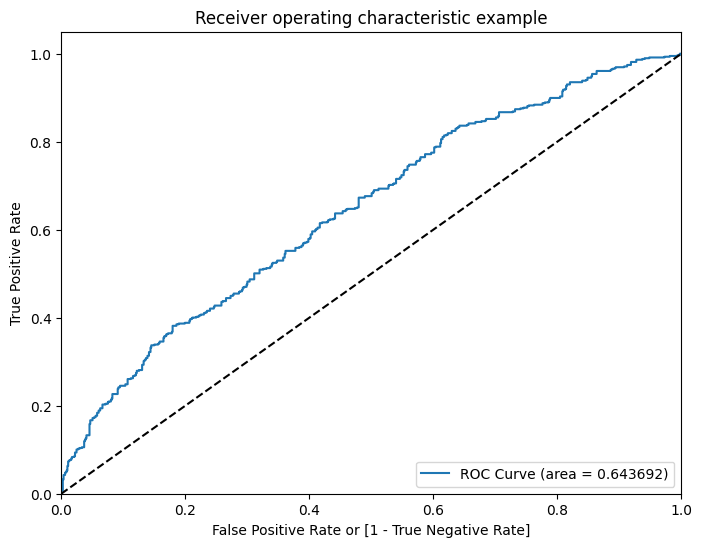

In [39]:
plot_roc_curve(ada_boost_clf)

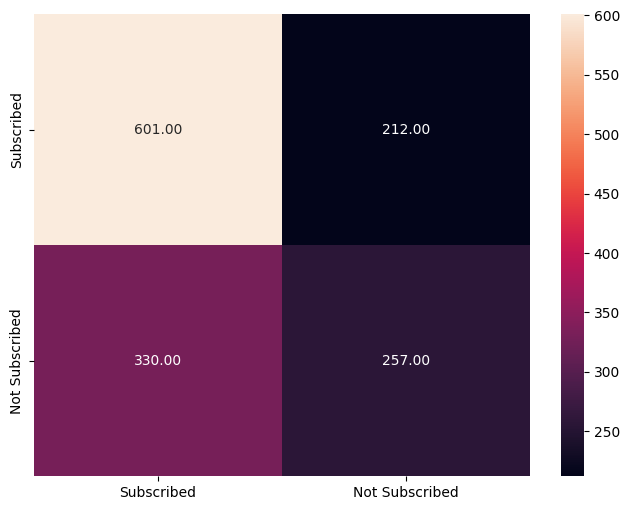

In [40]:
plot_confusion_matrix(ada_boost_clf)

In [41]:
print_classification_report(ada_boost_clf)

              precision    recall  f1-score   support

           0       0.65      0.74      0.69       813
           1       0.55      0.44      0.49       587

    accuracy                           0.61      1400
   macro avg       0.60      0.59      0.59      1400
weighted avg       0.60      0.61      0.60      1400



## Gradient Boosting Classifier

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)
gboost_clf.fit(X_train, y_train)
gboost_clf.score(X_test, y_test)

0.975

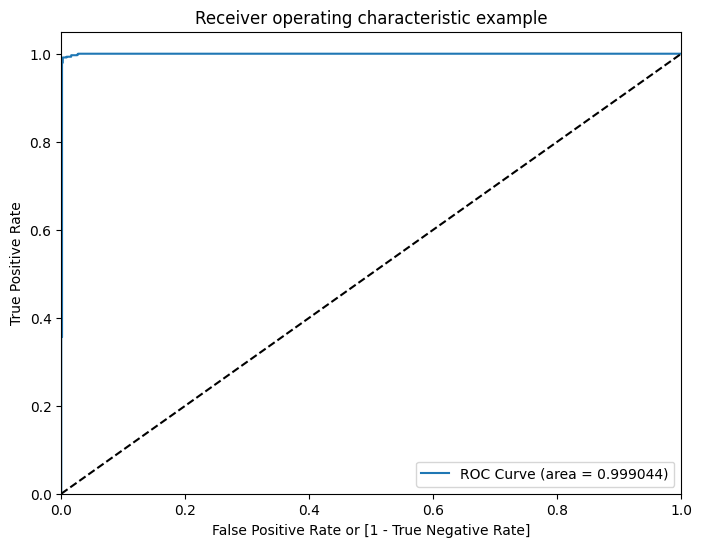

In [43]:
plot_roc_curve(gboost_clf)

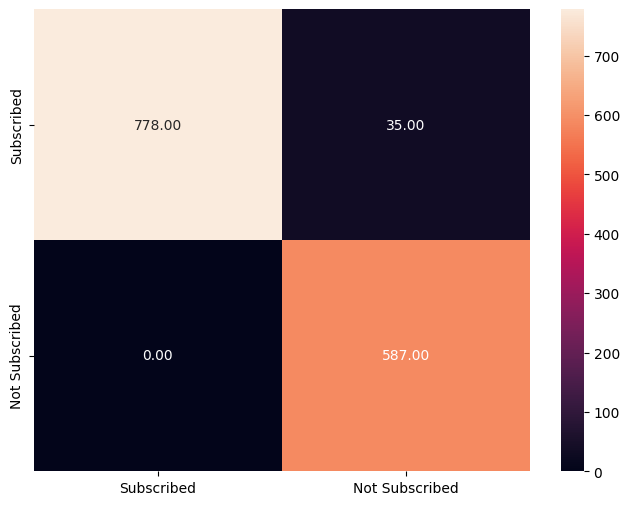

In [44]:
plot_confusion_matrix(gboost_clf)

In [45]:
print_classification_report(gboost_clf)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       813
           1       0.94      1.00      0.97       587

    accuracy                           0.97      1400
   macro avg       0.97      0.98      0.97      1400
weighted avg       0.98      0.97      0.98      1400



In [46]:
from sklearn.model_selection import cross_val_score

gboost_clf = GradientBoostingClassifier(n_estimators=500, max_depth=10)

cv_scores = cross_val_score(gboost_clf, X_train, y_train, cv=10, scoring='roc_auc')
print(cv_scores)
print("Mean accuracy: ", np.mean(cv_scores), " with standard deviation of: ", np.std(cv_scores))

[0.99238526 0.99912937 0.99886948 0.99047854 0.98885261 0.99945369
 0.9994797  0.99194839 0.99704731 0.99512221]
Mean accuracy:  0.995276656073959  with standard deviation of:  0.0038697784058814274


<Axes: xlabel='importance', ylabel='feature'>

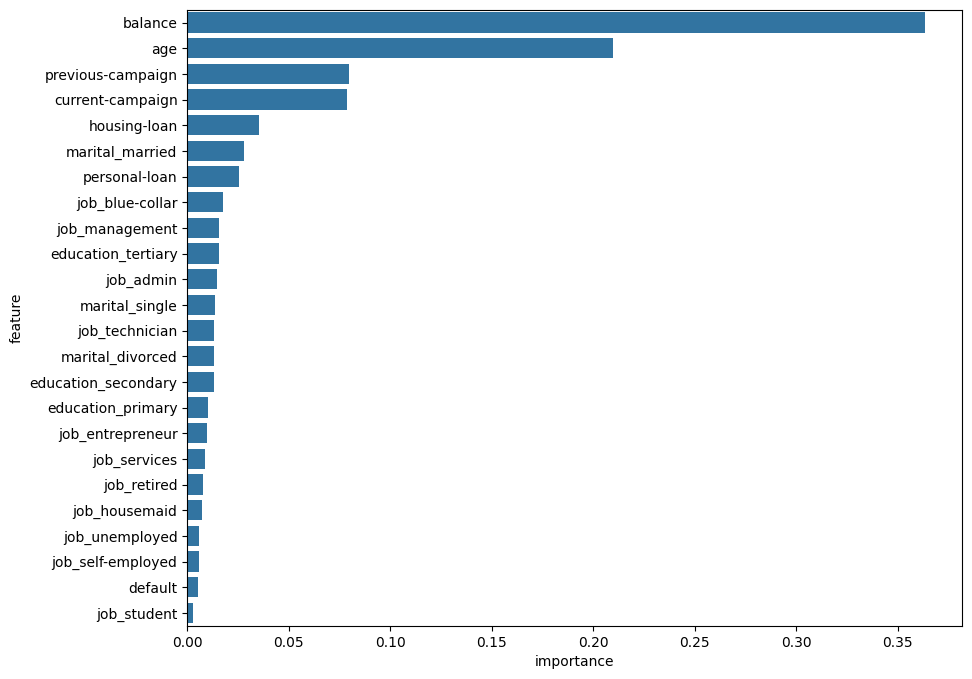

In [48]:
gboost_clf.fit(X_train, y_train)
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': gboost_clf.feature_importances_ })
feature_rank = feature_rank.sort_values('importance', ascending=False)

plt.figure(figsize=(10,8))
sn.barplot(y='feature', x='importance', data=feature_rank)

## XGBoost Classifier

In [51]:
import xgboost
from xgboost import XGBClassifier

xgboost_clf = XGBClassifier(n_estimators=500, max_depth=10)

xgboost_clf.fit(X_train, y_train)
xgboost_clf.score(X_test, y_test)

0.9485714285714286

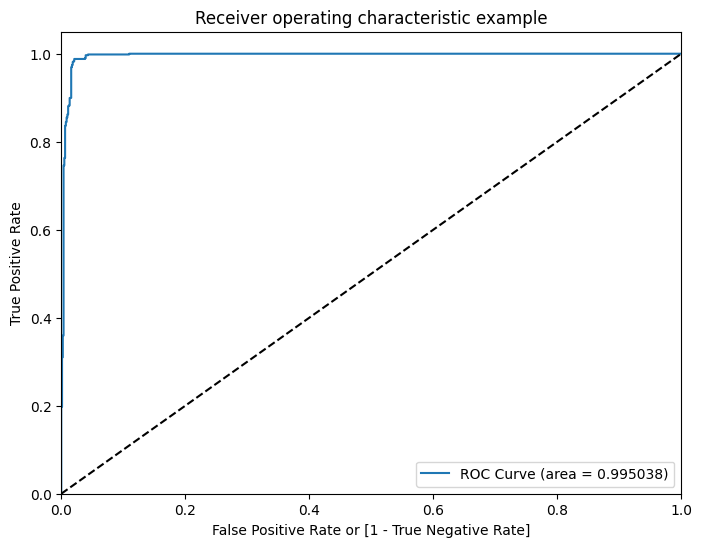

In [52]:
plot_roc_curve(xgboost_clf)

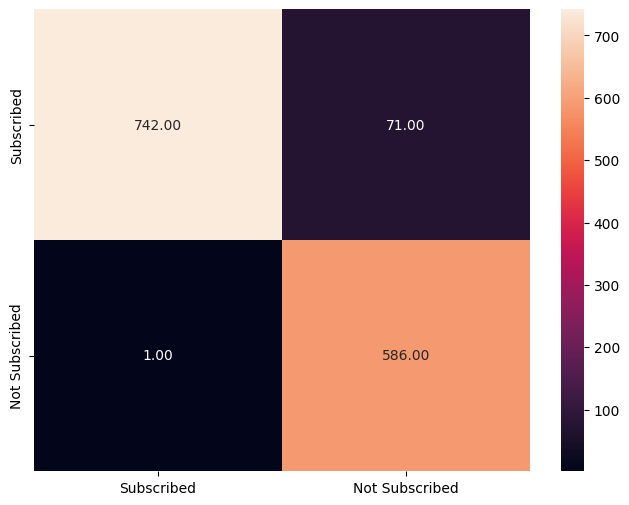

In [53]:
plot_confusion_matrix(xgboost_clf)

In [54]:
print_classification_report(xgboost_clf)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       813
           1       0.89      1.00      0.94       587

    accuracy                           0.95      1400
   macro avg       0.95      0.96      0.95      1400
weighted avg       0.95      0.95      0.95      1400

